In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
#Load the dataset
dataset=pd.read_csv('MVA_Vehicle_Sales_Counts_by_Month_for_Calendar_Year_2002_-_2019_up_to_August.csv')
dataset.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410


## 2.Display the average count of new vehicles sold per month (Consider from 2002 Jan to 2019 Aug)

In [4]:
 dataset["New"].mean()

29041.825471698114

## 3. Display the quarter where total sales of old cars is maximum

step1: using the lambda function to merge month and year column and adding it as another column called q. this is done because the datetime accepts single column as input
step2:using PeriodIndex and datetime to create another column called qtr which had years and quarters deatils
step3:using groupby to group all quarters and evaluate the sum of all the columns
step4:filtering out according to given condition by using .max()

In [119]:
#

dataset["q"]=dataset.apply(lambda x:'%s-%s' %(x['Month '],x['Year ']),axis=1)
dataset['qtr']=pd.PeriodIndex(pd.to_datetime(dataset.q), freq='Q')
#print(dataset)
quarter=dataset.groupby('qtr').sum().reset_index()
print(quarter[quarter['Total Sales Used']==quarter['Total Sales Used'].max()].qtr)
#quarter['Total Sales Used','qtr'].max()

69    2019Q2
Name: qtr, dtype: period[Q-DEC]


## 4.Plot the graph to display total sales in dollars (old+new) on a yearly basis

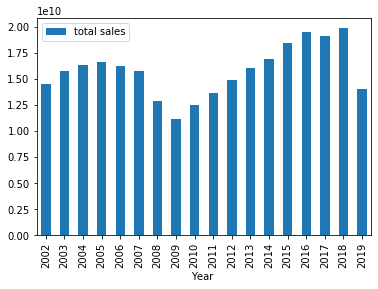

In [65]:
dataset['total sales'] = dataset['Total Sales New'] + dataset['Total Sales Used']
dataset.columns
grouped = dataset.groupby('Year ').sum().reset_index().plot(kind='bar',x='Year ',y='total sales')
#reset index is to get the year column shifted back by which is shifted down when operated by the groupby

plt.show()


## 5.Plot the graph to display the number of new cars sold in 2019 VS number of old cars sold in 2019 on monthly basis


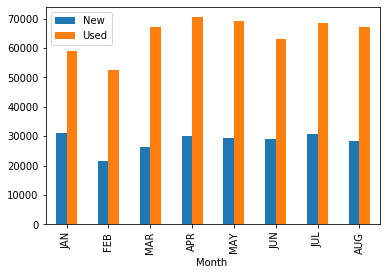

Index(['Year ', 'Month ', 'New', 'Used', 'Total Sales New', 'Total Sales Used',
       'total sales'],
      dtype='object')

In [82]:
is_2019=dataset['Year ']==2019 #filtering by boolean values returns True or False values 
f=dataset[is_2019] #filters all the false values 
#print(f)
f.plot(kind='bar',x='Month ',y=['New','Used'])
plt.show()
f.columns
